## Average Duration of Treatment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# mind the typo
vaso_df = pd.read_csv('vassopressors_mv_cohort.csv', usecols=['starttime', 'endtime'])
ivfl_df = pd.read_csv('inputevents_mv_cohort.csv', usecols=['starttime', 'endtime'])

# Compute Vasopressor and IV treatment durations
vaso_duration = (pd.to_datetime(vaso_df.endtime) - pd.to_datetime(vaso_df.starttime)) / pd.Timedelta(hours=1)
ivfl_duration = (pd.to_datetime(ivfl_df.endtime) - pd.to_datetime(ivfl_df.starttime)) / pd.Timedelta(hours=1)

# Remove outliers
vaso_duration = vaso_duration[(vaso_duration >= 0) & (vaso_duration < np.quantile(vaso_duration, 0.99))]
ivfl_duration = ivfl_duration[(ivfl_duration >= 0) & (ivfl_duration < np.quantile(vaso_duration, 0.99))]

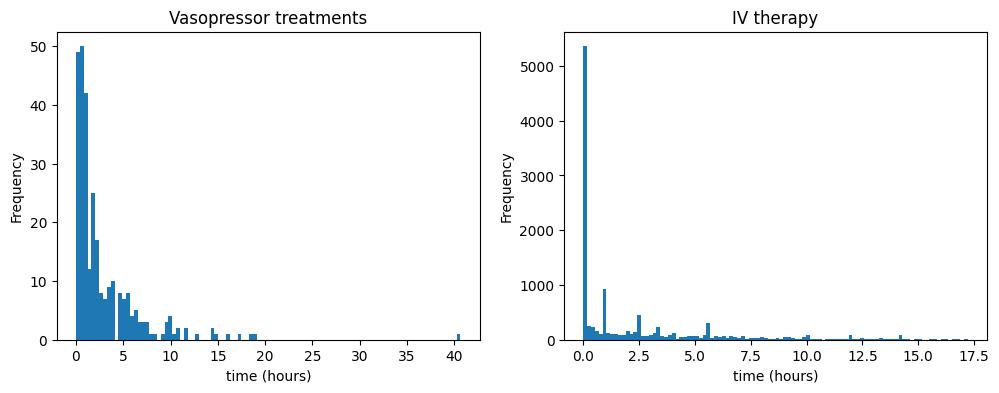

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(vaso_duration, bins=100)
plt.title('Vasopressor treatments')
plt.xlabel('time (hours)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ivfl_duration, bins=100)
plt.title('IV therapy')
plt.xlabel('time (hours)')
plt.ylabel('Frequency');

## Why so many low-duration IV therapies?

In [32]:
ivfl_df = pd.read_csv('inputevents_mv_cohort.csv', usecols=['starttime', 'endtime', 'amount', 'ordercategoryname'])

In [33]:
# Identify treatments <2 minutes
ivfl_duration = (pd.to_datetime(ivfl_df.endtime) - pd.to_datetime(ivfl_df.starttime)) / pd.Timedelta(minutes=1)
low_duration = ivfl_duration < 2

ivfl_df[low_duration].ordercategoryname.value_counts()

08-Antibiotics (IV)         1596
14-Oral/Gastric Intake      1364
05-Med Bolus                 546
01-Drips                     426
06-Insulin (Non IV)          354
11-Prophylaxis (Non IV)      242
10-Prophylaxis (IV)          224
03-IV Fluid Bolus            201
02-Fluids (Crystalloids)     108
13-Enteral Nutrition          73
09-Antibiotics (Non IV)       54
16-Pre Admission              43
04-Fluids (Colloids)           1
Name: ordercategoryname, dtype: int64

In [35]:
print('Total treatments:', len(ivfl_df))
print('Low-dim treatments:', len(ivfl_df[low_duration]))

Total treatments: 12174
Low-dim treatments: 5232


In [30]:
# What if we remove < 2?
condition1 = ~ivfl_df.ordercategoryname.isin(['08-Antibiotics (IV)', '14-Oral/Gastric Intake']) 
condition2 = ~ivfl_df.ordercategoryname.str.contains('Non IV')
ivfl_df = ivfl_df[condition1 & condition2]

# Durations...
ivfl_duration = (pd.to_datetime(ivfl_df.endtime) - pd.to_datetime(ivfl_df.starttime)) / pd.Timedelta(minutes=1)

# Remove outliers
ivfl_duration = ivfl_duration[(ivfl_duration >= 0) & (ivfl_duration < np.quantile(vaso_duration, 0.99))]

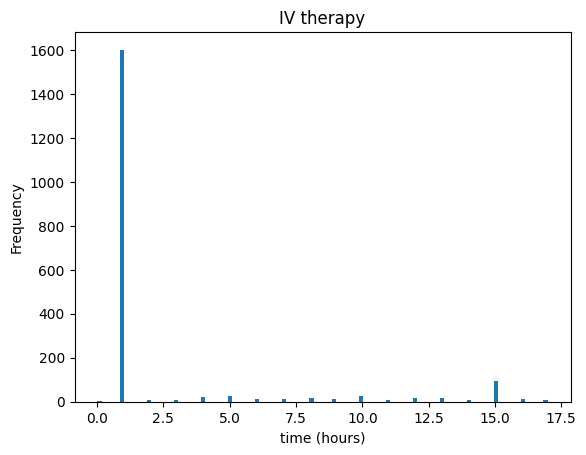

In [31]:
plt.hist(ivfl_duration, bins=100)
plt.title('IV therapy')
plt.xlabel('time (hours)')
plt.ylabel('Frequency');